# ___________Text Classification Using Multinomial Naive Bayes Classifier__                                                        

As data is discrete, Multinomial Naive Bayes Works best on this. Also features(words) are independent of each other.

# Importing Modules

In [138]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os                                                   #to open files(traversing directory)
import nltk                                                 #for stop words
nltk.download('stopwords')
from nltk.corpus import stopwords                   
from collections import Counter                            
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Getting Desired X_train and Y_train from given data

In [140]:
stop=set(stopwords.words("english"))                         #stopwords as a set
block_words = set(['sender:','subject:','writes:',           #other unnecessary words as a set
              'references:','organization:','>',
              'from:','date:','>i','22','|>','>>',
              'reply-to:','xref:','newsgroups:','>in',
              '>the','message-id:','lines:','path:',
              're:','--','sender:','last','better',
              'never','every','even','two','good','used'
              ,'first','need','going','must','really',
              'might','well','without','made','give',
              'look','try','far','less','seem','new',
              'make','many','way','since','using','take'
              ,'help','thanks','send','free','may','see',
              'much','want','find','would','one','like',
              'get','use','also','could','say','us','go',
              'please','said','set','got','sure','come',
              'lot','seems','able','anything','put','apr',
              'gmt','article','nntp-posting-host:','anyone',
              'time','still','back','another','read','number',
              'file','let','cannot','told','files','yet','per'])

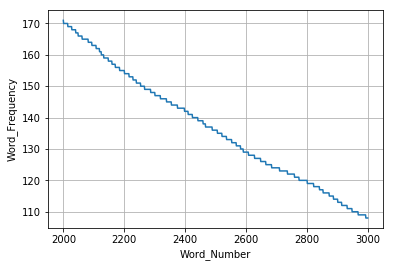

In [141]:
allWords=[]                                                 #a list of all words
mainPath="C:\\Users\\akshay\\Desktop\\20_newsgroups"        #path to main folder containing subfolders of each type of article
for subFolder in os.listdir(mainPath):                      #os.listdir lists all folders/files in a given folder   
    subFolderPath=mainPath+"\\"+subFolder                   #path of each subfolder
    for file in os.listdir(subFolderPath):                  #listing all files in each subfolder
        fileObj=open(subFolderPath+"\\"+file,"r")           #opening files sequentially
        fileContent=fileObj.read()                          #reading the content of the files
        words=(fileContent.strip()).split()                 #getting al the words in the file in the form of a list
        for w in words:                                     #adding the words to list allWords (excl. stop words)
            w=w.lower()                                     #if word is uppercase, make it lower
            if w in stop or w in block_words or len(w)<=2 or not(w.isalpha()):
                continue
            allWords.append(w)
        fileObj.close()
Words=Counter(allWords)
sortedWords=Words.most_common()                             #sorting words acc. to decreasing freq.,as list of word, freq.
x_axis=[]                                                   #current word
y_axis=[]                                                   #frequency
for i in range(2000,3000):                                  #since words after 3000 have frequency lesser than 100, we shall
    x_axis.append(i)                                        #take the first 3000 words only. Although, the scorr would increase
    y_axis.append(sortedWords[i][1])                        #with no. of features(words).However, prediction time will be high
plt.plot(x_axis,y_axis)                                     #if no. of words increase.
plt.xlabel("Word_Number")
plt.ylabel("Word_Frequency")
plt.grid()
plt.show()

In [157]:
#since words till 10000 have a frequency of >20, we will take these as feature names
feature_names=[]
feature_dict={}                                          #for faster search(dictionary)
for i in range(5000):
    feature_names.append(sortedWords[i][0])
    feature_dict[sortedWords[i][0]]=i                    #dict keys are words and values are indices
print(feature_names)

['people', 'university', 'know', 'think', 'world', 'right', 'believe', 'something', 'computer', 'system', 'god', 'news', 'state', 'work', 'someone', 'government', 'problem', 'usa', 'information', 'things', 'part', 'point', 'little', 'windows', 'data', 'question', 'probably', 'years', 'different', 'available', 'space', 'around', 'long', 'tell', 'least', 'best', 'program', 'software', 'public', 'power', 'thing', 'drive', 'run', 'support', 'rather', 'enough', 'case', 'hard', 'keep', 'fact', 'science', 'called', 'great', 'call', 'looking', 'found', 'real', 'nothing', 'quite', 'seen', 'law', 'whether', 'trying', 'old', 'actually', 'second', 'mean', 'research', 'group', 'ever', 'always', 'heard', 'several', 'bit', 'next', 'message', 'year', 'reason', 'access', 'three', 'maybe', 'national', 'getting', 'following', 'key', 'either', 'car', 'systems', 'given', 'thought', 'image', 'list', 'post', 'makes', 'kind', 'jesus', 'human', 'means', 'order', 'person', 'day', 'high', 'game', 'done', 'christ

In [158]:
x=[]
y=[]                                              
mainPath="C:\\Users\\akshay\\Desktop\\20_newsgroups"
arrayOfAllZeros=np.zeros(5000)
for subFolder in os.listdir(mainPath):                        
    subFolderPath=mainPath+"\\"+subFolder                   
    for file in os.listdir(subFolderPath):                  
        fileObj=open(subFolderPath+"\\"+file,"r")           
        words=((fileObj.read()).strip()).split()
        curCounts=arrayOfAllZeros.copy()                           #this will contain x of current file
        y.append(subFolder)                                        #subFolder is the type of article eg.alt.atheism
        for w in words:
            w=w.lower()
            if w in feature_dict:
                curCounts[feature_dict[w]]+=1
        x.append(curCounts)
        fileObj.close()
x=np.array(x)
y=np.array(y)
print(x.shape,type(x))
print(y.shape,type(y))

(19997, 5000) <class 'numpy.ndarray'>
(19997,) <class 'numpy.ndarray'>


In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)       #splitting data into train and test

# Classifying using inbuilt Multinomial Naive Bayes in SKLearn

In [160]:
clf=MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [161]:
y_pred=clf.predict(x_test)
print(y_pred)
print(set(y_pred))

['comp.windows.x' 'sci.med' 'talk.politics.guns' ...
 'soc.religion.christian' 'rec.autos' 'sci.space']
{'alt.atheism', 'rec.sport.baseball', 'comp.windows.x', 'soc.religion.christian', 'talk.politics.mideast', 'sci.electronics', 'sci.space', 'rec.autos', 'comp.graphics', 'comp.os.ms-windows.misc', 'talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'misc.forsale', 'rec.motorcycles', 'rec.sport.hockey', 'talk.politics.guns', 'talk.religion.misc', 'sci.crypt', 'comp.sys.mac.hardware', 'sci.med'}


In [162]:
clf.score(x_test,y_test)

0.78575

In [163]:
confusion_matrix(y_test,y_pred) #as we can see most of the predictions belong to correct class(highest values along diagonal)

array([[145,   0,   0,   0,   0,   0,   0,   1,   5,   0,   0,   0,   0,
          1,   1,   5,   2,   2,   5,  26],
       [  2, 139,  20,   6,   5,  14,   6,   1,   3,   0,   0,   0,   2,
          2,   1,   0,   0,   0,   0,   0],
       [  0,   9, 158,   9,   5,   6,   3,   0,   0,   1,   0,   0,   4,
          0,   2,   0,   0,   0,   0,   0],
       [  0,   6,  16, 125,  17,   2,   8,   2,   0,   0,   0,   1,   5,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   8,  14, 158,   0,   9,   2,   0,   0,   0,   0,   5,
          0,   0,   0,   0,   0,   0,   0],
       [  0,  25,  16,   2,   1, 142,   0,   0,   0,   1,   1,   5,   1,
          0,   2,   0,   0,   0,   0,   0],
       [  0,   1,   1,  13,   7,   1, 157,  10,   4,   3,   2,   2,   7,
          1,   2,   0,   0,   0,   3,   0],
       [  1,   0,   1,   3,   2,   2,   8, 180,  11,   0,   0,   0,   7,
          1,   0,   0,   3,   0,   1,   1],
       [  0,   1,   1,   0,   0,   0,   4,  13, 197,   1,   0,  

In [164]:
classification_report(y_test,y_pred)

'                          precision    recall  f1-score   support\n\n             alt.atheism       0.70      0.75      0.73       193\n           comp.graphics       0.68      0.69      0.69       201\n comp.os.ms-windows.misc       0.68      0.80      0.74       197\ncomp.sys.ibm.pc.hardware       0.68      0.69      0.68       182\n   comp.sys.mac.hardware       0.75      0.81      0.77       196\n          comp.windows.x       0.81      0.72      0.77       196\n            misc.forsale       0.75      0.73      0.74       214\n               rec.autos       0.81      0.81      0.81       221\n         rec.motorcycles       0.85      0.88      0.86       224\n      rec.sport.baseball       0.91      0.93      0.92       194\n        rec.sport.hockey       0.95      0.95      0.95       191\n               sci.crypt       0.90      0.93      0.91       194\n         sci.electronics       0.75      0.71      0.73       196\n                 sci.med       0.90      0.84      0.87    

# My Own Implementation of Naive Bayes for Text Classification

In [165]:
#fit function
def fit(x_train,y_train):
    result={}                                             #dictionary
    classes=set(y_train)                                  #set of all classes
    result["total_data"]=len(y_train)                     #total no. of data points 
    for i in classes:                                     #for each class i
        result[i]={}                                      #create a dictionary for class i
        c=(y==i)                                          #True wherever y belongs to class i, False otherwise
        curFiles=x[c]                                     #getting all files(data points) belonging to class i
        totalWordsInCurClass=0                            #total no. of words in current class
        for j in range(len(feature_names)):               #for each word j
            result[i][j]=curFiles[:,j].sum()              #no. of occurences of word no. j in files of class i
            totalWordsInCurClass+=result[i][j]
        result[i]["total_words"]=totalWordsInCurClass
        result[i]["total_count"]=len(curFiles)            #no. of data points belonging to current class
    return result

In [166]:
#function to calculate probability:
def probability(result,x,a):                         #a is the current class whose prob.we want to calculate, x is data point
    product=np.log((result[a]["total_count"])/(result["total_data"]))
    for i in range(len(feature_names)):
        if x[i]==0:
            continue
        numerator=result[a][i]+1
        denominator=result[a]["total_words"]+len(feature_names)
        prob=np.log(numerator/denominator)
        product+=prob
    return product

In [167]:
#predicting for a single data point:
def predict_single_point(result,x_test):             #x_test is a single point
    max_prob=float('-inf')                           #dummy value(as log will give -ve, we take sufficiently high -ve no.)
    max_prob_class=-1                                #dummy value
    for i in result.keys():
        if i=="total_data":
            continue
        cur_prob=probability(result,x_test,i)
        if cur_prob>max_prob:
            max_prob=cur_prob
            max_prob_class=i
    return max_prob_class

In [168]:
#predict function:
def predict(result,x_test):
    y_pred=[]
    for i in x_test:
        y_pred.append(predict_single_point(result,i))
    return np.array(y_pred)

In [169]:
result=fit(x_train,y_train)
y_pred2=predict(result,x_test)
print(y_pred2)
print(set(y_pred2))

['comp.windows.x' 'sci.med' 'talk.politics.guns' ...
 'soc.religion.christian' 'rec.motorcycles' 'sci.space']
{'alt.atheism', 'rec.sport.baseball', 'comp.windows.x', 'soc.religion.christian', 'talk.politics.mideast', 'sci.electronics', 'sci.space', 'rec.autos', 'comp.graphics', 'comp.os.ms-windows.misc', 'talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'misc.forsale', 'rec.motorcycles', 'rec.sport.hockey', 'talk.politics.guns', 'talk.religion.misc', 'sci.crypt', 'comp.sys.mac.hardware', 'sci.med'}


In [170]:
confusion_matrix(y_test,y_pred2) #as we can see most of the predictions belong to correct class(highest values along diagonal)

array([[163,   0,   0,   0,   0,   0,   0,   0,   4,   1,   0,   0,   0,
          1,   1,   2,   1,   2,   3,  15],
       [  1, 157,  18,   5,   4,   4,   4,   2,   3,   0,   0,   0,   1,
          1,   1,   0,   0,   0,   0,   0],
       [  0,   9, 167,   7,   2,   4,   3,   0,   0,   1,   0,   0,   3,
          0,   1,   0,   0,   0,   0,   0],
       [  0,   6,   7, 145,   9,   1,  10,   1,   0,   0,   0,   0,   3,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   2,   9, 170,   0,   8,   1,   0,   0,   0,   0,   6,
          0,   0,   0,   0,   0,   0,   0],
       [  0,  21,  12,   2,   1, 151,   0,   1,   0,   0,   0,   4,   1,
          0,   1,   0,   1,   0,   1,   0],
       [  0,   1,   1,   8,   3,   0, 181,   8,   2,   1,   0,   3,   2,
          1,   0,   0,   0,   0,   3,   0],
       [  1,   0,   2,   0,   2,   1,   8, 196,   2,   0,   0,   0,   4,
          1,   0,   1,   2,   0,   0,   1],
       [  0,   1,   1,   1,   0,   0,   2,   4, 213,   0,   0,  

In [171]:
classification_report(y_test,y_pred2)       #all scores are better than those of SKLearn MNB (see f1 score)

'                          precision    recall  f1-score   support\n\n             alt.atheism       0.78      0.84      0.81       193\n           comp.graphics       0.72      0.78      0.75       201\n comp.os.ms-windows.misc       0.75      0.85      0.79       197\ncomp.sys.ibm.pc.hardware       0.78      0.80      0.79       182\n   comp.sys.mac.hardware       0.84      0.87      0.85       196\n          comp.windows.x       0.90      0.77      0.83       196\n            misc.forsale       0.79      0.85      0.82       214\n               rec.autos       0.87      0.89      0.88       221\n         rec.motorcycles       0.91      0.95      0.93       224\n      rec.sport.baseball       0.95      0.95      0.95       194\n        rec.sport.hockey       0.98      0.97      0.98       191\n               sci.crypt       0.93      0.94      0.93       194\n         sci.electronics       0.84      0.78      0.80       196\n                 sci.med       0.94      0.88      0.91    